# **TelecomX-Parte2**

# **🛠️ Preparación de los Datos**

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv("/content/datos_tratados.csv")

In [ ]:
if "customerID" in df.columns:
    df.drop(columns=["customerID"], inplace=True)


In [ ]:
df.drop(columns=["customerID"], inplace=True, errors="ignore")

In [ ]:
if "Genero" in df.columns:
    df["Genero"] = df["Genero"].astype(str).str.strip().str.lower()
    genero_map = {"masculino": 1, "femenino": 0, "male": 1, "female": 0}
    df["Genero"] = df["Genero"].map(genero_map).fillna(0).astype(int)

In [ ]:
bool_cols = df.select_dtypes(include=["bool"]).columns
df[bool_cols] = df[bool_cols].astype(int)

# **Encoding**

In [ ]:
categoricas = df.select_dtypes(include=["object"]).columns
df = pd.get_dummies(df, columns=categoricas, drop_first=True, dtype=int)

In [ ]:
df = df.apply(pd.to_numeric)

In [ ]:
assert all(np.issubdtype(t, np.number) for t in df.dtypes), "⚠️ Aún quedan columnas no numéricas"
print("✅ Dataset 100% numérico. Dimensiones:", df.shape)

✅ Dataset 100% numérico. Dimensiones: (7032, 25)


In [ ]:
df.head()

,Churn,Genero,AdultoMayor,TienePareja,TieneDependientes,MesesCliente,phone.PhoneService,phone.MultipleLines,internet.OnlineSecurity,internet.OnlineBackup,...,FacturaMensual,FacturaTotal,FacturaDiaria,internet.InternetService_fiber optic,internet.InternetService_no,account.Contract_one year,account.Contract_two year,account.PaymentMethod_credit card (automatic),account.PaymentMethod_electronic check,account.PaymentMethod_mailed check
0,0,0,0,1,1,9,1,0,0,1,...,65.6,593.30,2.19,0,0,1,0,0,0,1
1,0,1,0,0,0,9,1,1,0,0,...,59.9,542.40,2.00,0,0,0,0,0,0,1
2,1,1,0,0,0,4,1,0,0,0,...,73.9,280.85,2.46,1,0,0,0,0,1,0
3,1,1,1,1,0,13,1,0,0,1,...,98.0,1237.85,3.27,1,0,0,0,0,1,0
4,1,0,1,1,0,3,1,0,0,0,...,83.9,267.40,2.80,1,0,0,0,0,0,1


In [ ]:
df.to_csv("/content/datos_listos_modelo.csv", index=False)

# **Verificación de la Proporción de Cancelación (Churn)**

In [ ]:
df = pd.read_csv("/content/datos_listos_modelo.csv")

In [ ]:
conteo = df["Churn"].value_counts()
proporcion = df["Churn"].value_counts(normalize=True) * 100

In [ ]:
print("📊 Distribución de clases:")
print(conteo)
print("\n📈 Proporción de clases (%):")
print(proporcion.round(2))

📊 Distribución de clases:
Churn
0    5163
1    1869
Name: count, dtype: int64

📈 Proporción de clases (%):
Churn
0    73.42
1    26.58
Name: proportion, dtype: float64


In [ ]:
umbral = 0.40  # Si alguna clase es < 40% → posible desbalance
if proporcion.min() < (umbral * 100):
    print("\n⚠️ Existe un posible desbalance de clases. Podría ser necesario balancear los datos.")
else:
    print("\n✅ Las clases están relativamente balanceadas.")


⚠️ Existe un posible desbalance de clases. Podría ser necesario balancear los datos.


In [ ]:
from google.colab import files
files.download("/content/datos_listos_modelo.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **Balanceo de Clases (opcional)**

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter

In [ ]:
X = df.drop("Churn", axis=1)
y = df["Churn"]

In [ ]:
print("📊 Distribución original:", Counter(y))

📊 Distribución original: Counter({0: 5163, 1: 1869})


In [ ]:
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

In [ ]:
print("✅ Distribución balanceada:", Counter(y_res))

✅ Distribución balanceada: Counter({0: 5163, 1: 5163})


# **Normalización o Estandarización (si es necesario)**

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
X = df.drop("Churn", axis=1)
y = df["Churn"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
pd.DataFrame(X_train_scaled, columns=X.columns).to_csv("/content/X_train_scaled.csv", index=False)
pd.DataFrame(X_test_scaled, columns=X.columns).to_csv("/content/X_test_scaled.csv", index=False)
y_train.to_csv("/content/y_train.csv", index=False)
y_test.to_csv("/content/y_test.csv", index=False)

print("✅ Estandarización completada con datos sin balancear.")
print("📊 X_train shape:", X_train.shape)
print("📊 X_test shape:", X_test.shape)

✅ Estandarización completada con datos sin balancear.
📊 X_train shape: (5625, 24)
📊 X_test shape: (1407, 24)


# **🎯 Correlación y Selección de Variables**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
corr = df.corr()

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


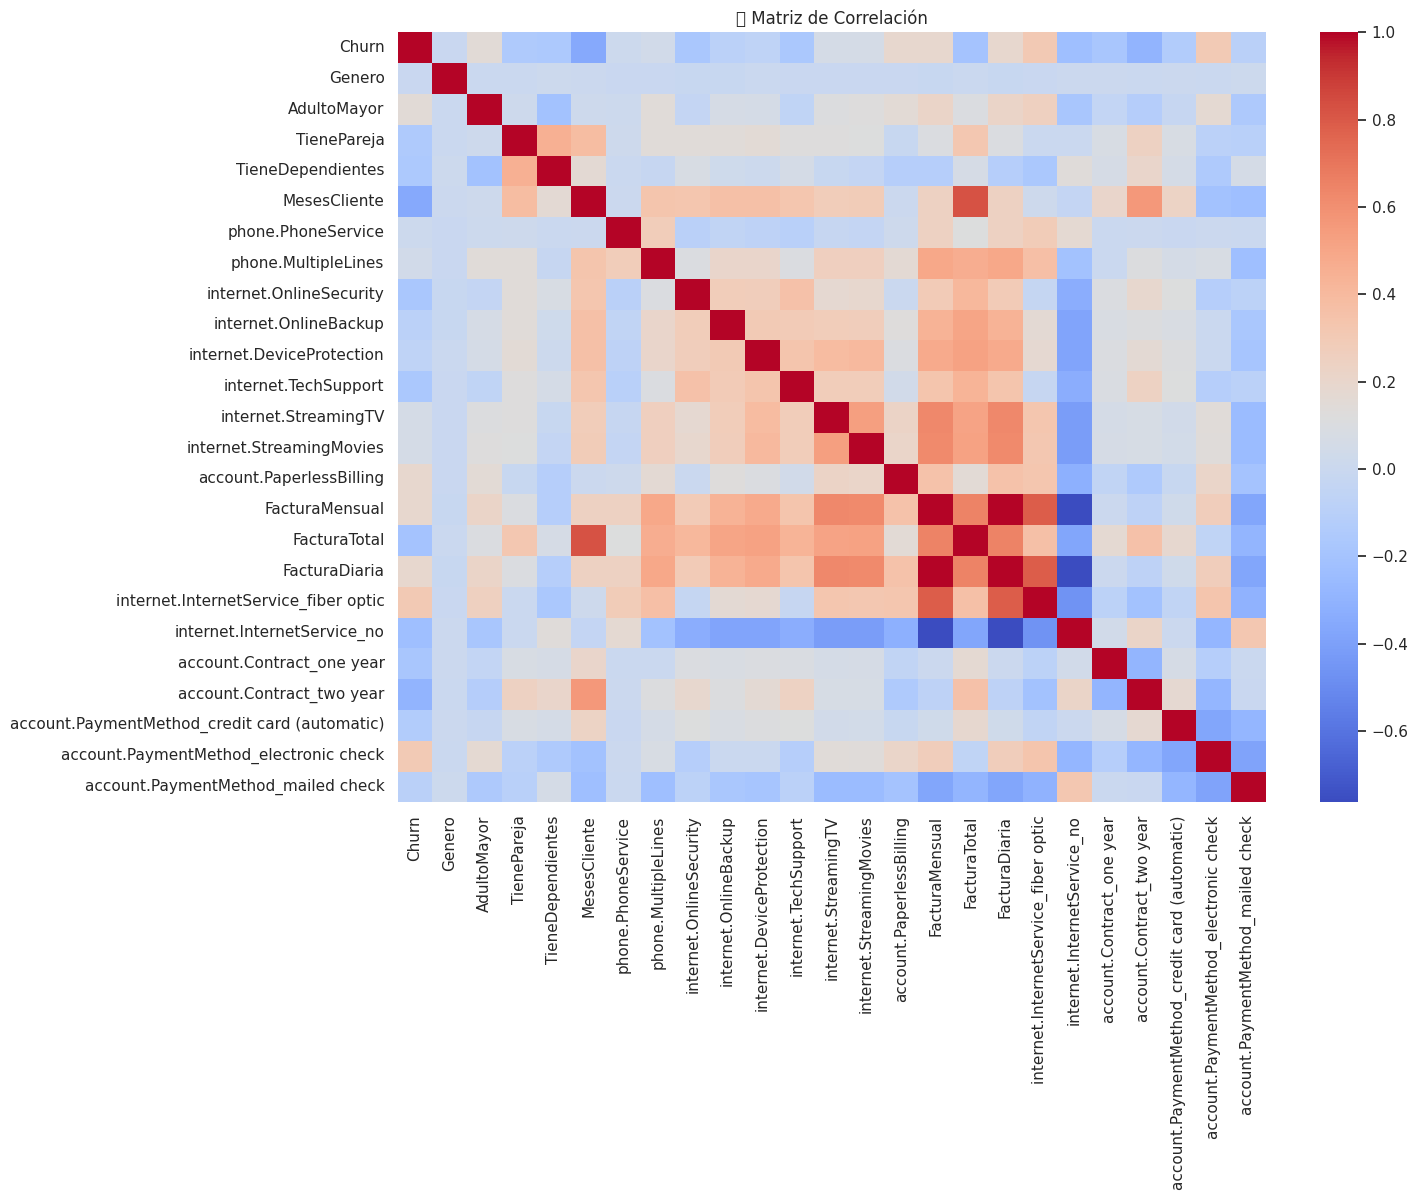

In [ ]:
plt.figure(figsize=(14,10))
sns.heatmap(corr, cmap="coolwarm", annot=False)
plt.title("📊 Matriz de Correlación")
plt.show()

In [ ]:
corr_churn = corr["Churn"].sort_values(ascending=False)

In [ ]:
print("🔥 Variables más correlacionadas con la cancelación (Churn):")
print(corr_churn.head(10))
print("\n❄️ Variables menos correlacionadas con la cancelación (Churn):")
print(corr_churn.tail(10))

🔥 Variables más correlacionadas con la cancelación (Churn):
Churn                                     1.000000
internet.InternetService_fiber optic      0.307463
account.PaymentMethod_electronic check    0.301455
FacturaDiaria                             0.192914
FacturaMensual                            0.192858
account.PaperlessBilling                  0.191454
AdultoMayor                               0.150541
internet.StreamingTV                      0.063254
internet.StreamingMovies                  0.060860
phone.MultipleLines                       0.040033
Name: Churn, dtype: float64

❄️ Variables menos correlacionadas con la cancelación (Churn):
account.PaymentMethod_credit card (automatic)   -0.134687
TienePareja                                     -0.149982
TieneDependientes                               -0.163128
internet.TechSupport                            -0.164716
internet.OnlineSecurity                         -0.171270
account.Contract_one year                       

# **Análisis Dirigido**

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(14,6))

<Figure size 1400x600 with 0 Axes>

<Figure size 1400x600 with 0 Axes>

/tmp/ipython-input-1057954847.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Churn", y="MesesCliente", data=df, palette="Set2")


Text(0, 0.5, 'Meses de Cliente')

/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


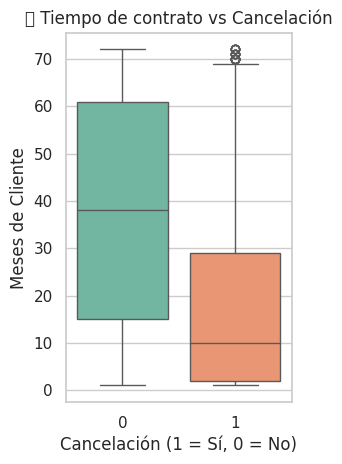

In [ ]:
plt.subplot(1, 2, 1)
sns.boxplot(x="Churn", y="MesesCliente", data=df, palette="Set2")
plt.title("📊 Tiempo de contrato vs Cancelación")
plt.xlabel("Cancelación (1 = Sí, 0 = No)")
plt.ylabel("Meses de Cliente")

/tmp/ipython-input-889663236.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Churn", y="FacturaTotal", data=df, palette="Set3")
/tmp/ipython-input-889663236.py:6: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


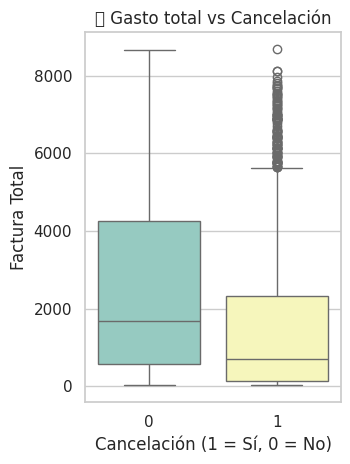

In [ ]:
plt.subplot(1, 2, 2)
sns.boxplot(x="Churn", y="FacturaTotal", data=df, palette="Set3")
plt.title("💰 Gasto total vs Cancelación")
plt.xlabel("Cancelación (1 = Sí, 0 = No)")
plt.ylabel("Factura Total")
plt.tight_layout()
plt.show()

/tmp/ipython-input-1374446398.py:12: UserWarning: Glyph 9203 (\N{HOURGLASS WITH FLOWING SAND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1374446398.py:12: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9203 (\N{HOURGLASS WITH FLOWING SAND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


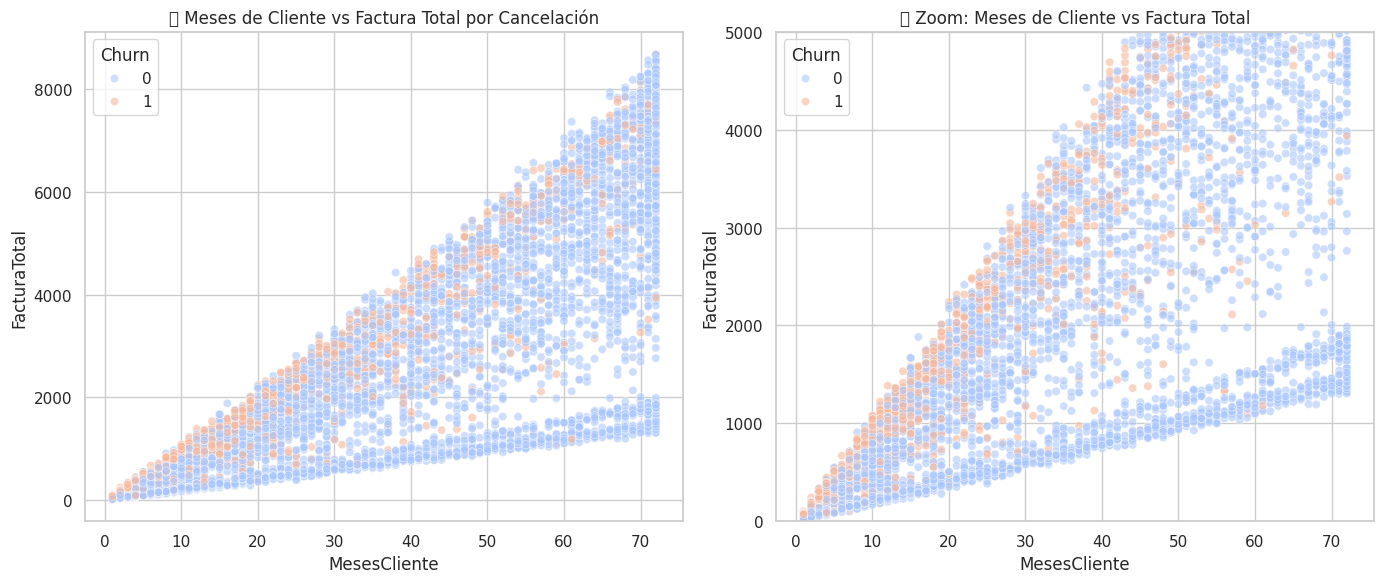

In [ ]:
plt.figure(figsize=(14,6))

plt.subplot(1, 2, 1)
sns.scatterplot(x="MesesCliente", y="FacturaTotal", hue="Churn", data=df, palette="coolwarm", alpha=0.6)
plt.title("⏳ Meses de Cliente vs Factura Total por Cancelación")

plt.subplot(1, 2, 2)
sns.scatterplot(x="MesesCliente", y="FacturaTotal", hue="Churn", data=df, palette="coolwarm", alpha=0.6)
plt.ylim(0, 5000)  # Zoom para ver mejor datos en rango bajo
plt.title("🔍 Zoom: Meses de Cliente vs Factura Total")

plt.tight_layout()
plt.show()

In [ ]:
from google.colab import files
files.download("/content/datos_listos_modelo.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **🤖 Modelado Predictivo**

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
X = df.drop("Churn", axis=1)
y = df["Churn"]

In [ ]:
# Dividir en entrenamiento (70%) y prueba (30%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y)

In [ ]:
#  Verificar tamaños de los conjuntos
print("📊 Dimensiones del dataset completo:", X.shape)
print("📚 Entrenamiento:", X_train.shape, " Target:", y_train.shape)
print("🧪 Prueba:", X_test.shape, " Target:", y_test.shape)

📊 Dimensiones del dataset completo: (7032, 24)
📚 Entrenamiento: (4922, 24)  Target: (4922,)
🧪 Prueba: (2110, 24)  Target: (2110,)


# **Creación de Modelos**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
X = df.drop("Churn", axis=1)
y = df["Churn"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_scaled, y_train)
y_pred_lr = log_reg.predict(X_test_scaled)

In [ ]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)


In [ ]:
print("📊 Regresión Logística (con normalización)")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

print("\n🌳 Random Forest (sin normalización)")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

📊 Regresión Logística (con normalización)
Accuracy: 0.8033175355450237
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1549
           1       0.66      0.54      0.60       561

    accuracy                           0.80      2110
   macro avg       0.75      0.72      0.73      2110
weighted avg       0.79      0.80      0.80      2110


🌳 Random Forest (sin normalización)
Accuracy: 0.7867298578199052
              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1549
           1       0.63      0.47      0.54       561

    accuracy                           0.79      2110
   macro avg       0.73      0.69      0.70      2110
weighted avg       0.77      0.79      0.78      2110



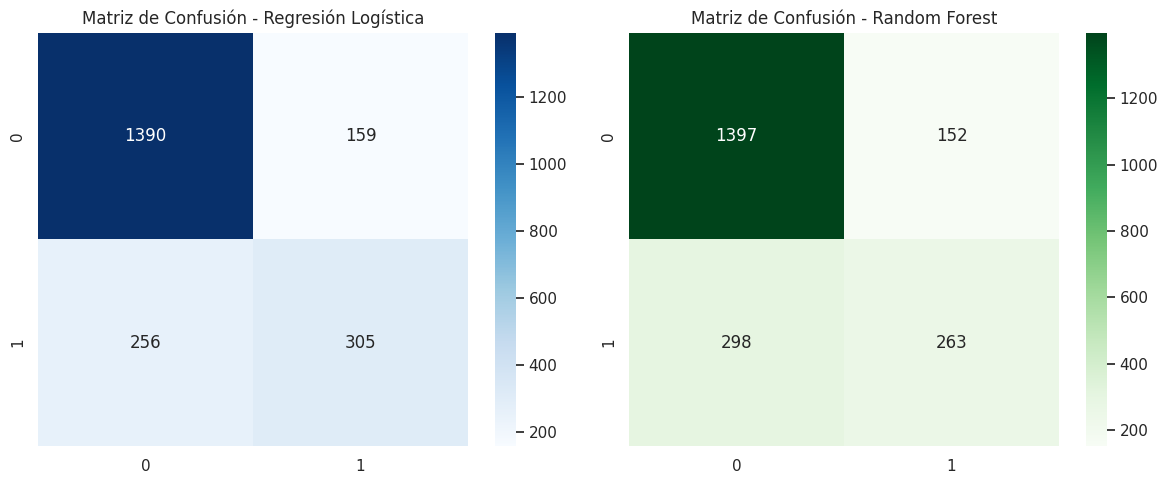

In [ ]:
#  Matrices de confusión
fig, axes = plt.subplots(1, 2, figsize=(12,5))

sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title("Matriz de Confusión - Regresión Logística")

sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt="d", cmap="Greens", ax=axes[1])
axes[1].set_title("Matriz de Confusión - Random Forest")

plt.tight_layout()
plt.show()

# **Evaluación de los Modelos**

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd



In [ ]:
# ✅ Función para evaluar un modelo
def evaluar_modelo(nombre, y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    print("\n==============================")
    print(f"🔎 Evaluación: {nombre}")
    print(f"Accuracy :  {acc:.4f}")
    print(f"Precisión: {prec:.4f}")
    print(f"Recall   : {rec:.4f}")
    print(f"F1-Score : {f1:.4f}")
    print("==============================")

    # 📊 Matriz de confusión
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Matriz de Confusión - {nombre}")
    plt.xlabel("Predicciones")
    plt.ylabel("Valores Reales")
    plt.show()

    return {
        "Modelo": nombre,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1-Score": f1
    }


🔎 Evaluación: Regresión Logística
Accuracy :  0.8033
Precisión: 0.6573
Recall   : 0.5437
F1-Score : 0.5951


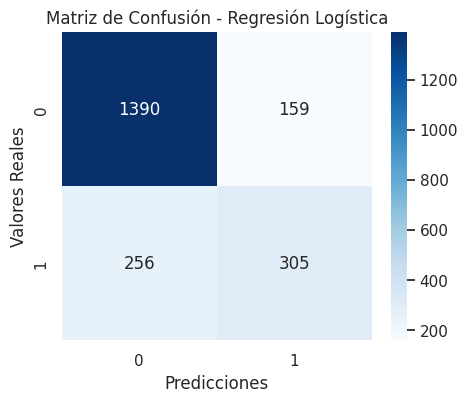

In [ ]:
# 📌 Evaluar Regresión Logística
res_lr = evaluar_modelo("Regresión Logística", y_test, y_pred_lr)


🔎 Evaluación: Random Forest
Accuracy :  0.7867
Precisión: 0.6337
Recall   : 0.4688
F1-Score : 0.5389


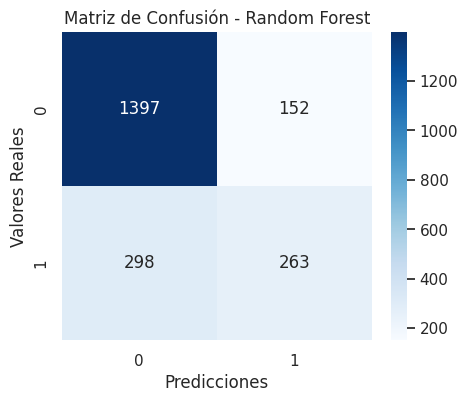

In [ ]:
# 📌 Evaluar Random Forest
res_rf = evaluar_modelo("Random Forest", y_test, y_pred_rf)

In [ ]:
# 📊 Comparación en tabla
resultados = pd.DataFrame([res_lr, res_rf])
print("\n📊 Comparación de Modelos:")
print(resultados.sort_values(by="F1-Score", ascending=False))


📊 Comparación de Modelos:
                Modelo  Accuracy  Precision    Recall  F1-Score
0  Regresión Logística  0.803318   0.657328  0.543672  0.595122
1        Random Forest  0.786730   0.633735  0.468806  0.538934


# **📋 Interpretación y Conclusiones**

#**Análisis de la Importancia de las Variables**

In [ ]:
#📌 1. Importancia en Regresión Logística
#Los coeficientes muestran si una variable aumenta (+) o disminuye (–) la probabilidad de cancelación.

In [ ]:
# ✅ Importancia de variables en Regresión Logística
import numpy as np

coeficientes = pd.DataFrame({
    "Variable": X_train.columns,
    "Coeficiente": log_reg.coef_[0]
})
coeficientes["Impacto"] = np.where(coeficientes["Coeficiente"] > 0, "↑ Mayor riesgo de cancelación", "↓ Menor riesgo de cancelación")
coeficientes = coeficientes.sort_values(by="Coeficiente", ascending=False)

print("📊 Coeficientes de Regresión Logística")
display(coeficientes.head(10))   # Top 10 más influyentes

📊 Coeficientes de Regresión Logística


,Variable,Coeficiente,Impacto
15,FacturaTotal,0.643131,↑ Mayor riesgo de cancelación
17,internet.InternetService_fiber optic,0.611978,↑ Mayor riesgo de cancelación
11,internet.StreamingTV,0.208762,↑ Mayor riesgo de cancelación
22,account.PaymentMethod_electronic check,0.182759,↑ Mayor riesgo de cancelación
13,account.PaperlessBilling,0.180573,↑ Mayor riesgo de cancelación
12,internet.StreamingMovies,0.163071,↑ Mayor riesgo de cancelación
6,phone.MultipleLines,0.132911,↑ Mayor riesgo de cancelación
1,AdultoMayor,0.094529,↑ Mayor riesgo de cancelación
9,internet.DeviceProtection,0.041645,↑ Mayor riesgo de cancelación
23,account.PaymentMethod_mailed check,0.005552,↑ Mayor riesgo de cancelación


In [ ]:
# 📌 2. Importancia en Random Forest
# Random Forest usa la reducción de impureza para calcular la importancia.

📊 Importancia de Variables en Random Forest


,Variable,Importancia
15,FacturaTotal,0.169983
4,MesesCliente,0.150257
14,FacturaMensual,0.140712
16,FacturaDiaria,0.120968
17,internet.InternetService_fiber optic,0.048786
22,account.PaymentMethod_electronic check,0.038070
20,account.Contract_two year,0.030926
0,Genero,0.025810
13,account.PaperlessBilling,0.025680
19,account.Contract_one year,0.021973


/tmp/ipython-input-2409751644.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importancia", y="Variable", data=importances.head(10), palette="viridis")


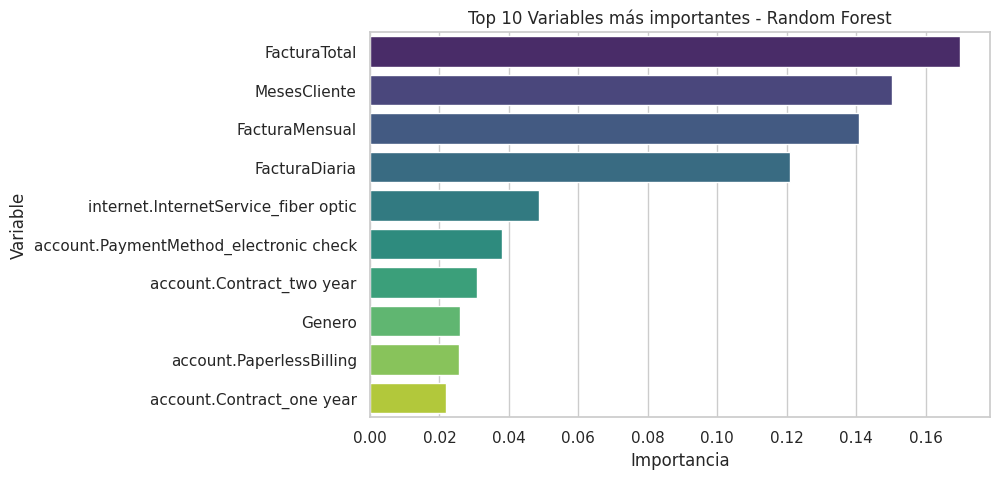

In [ ]:
# ✅ Importancia de variables en Random Forest
importances = pd.DataFrame({
    "Variable": X_train.columns,
    "Importancia": rf.feature_importances_
})
importances = importances.sort_values(by="Importancia", ascending=False)

print("📊 Importancia de Variables en Random Forest")
display(importances.head(10))

# 🔎 Visualización
plt.figure(figsize=(8,5))
sns.barplot(x="Importancia", y="Variable", data=importances.head(10), palette="viridis")
plt.title("Top 10 Variables más importantes - Random Forest")
plt.show()

In [ ]:
#📌 3. Para otros modelos (opcional)
#KNN: no tiene coeficientes directos → la relevancia se analiza viendo cómo cambian las predicciones al eliminar/alterar variables (lo haríamos con permutation importance).
#SVM lineal: se interpreta igual que la regresión logística (coef_).
#XGBoost o Gradient Boosting: tienen feature_importances_ al igual que Random Forest.

#Ejemplo con permutation importance (sirve para KNN, SVM, redes neuronales, etc.):

In [ ]:
from sklearn.inspection import permutation_importance

# ✅ Ejemplo con Random Forest (también se puede con KNN o SVM)
perm_importance = permutation_importance(rf, X_test, y_test, n_repeats=10, random_state=42)

perm_df = pd.DataFrame({
    "Variable": X_test.columns,
    "Importancia": perm_importance.importances_mean
}).sort_values(by="Importancia", ascending=False)

print("📊 Importancia de Variables (Permutation Importance)")
display(perm_df.head(10))

📊 Importancia de Variables (Permutation Importance)


,Variable,Importancia
4,MesesCliente,0.021280
17,internet.InternetService_fiber optic,0.011848
15,FacturaTotal,0.006682
19,account.Contract_one year,0.006209
20,account.Contract_two year,0.002891
7,internet.OnlineSecurity,0.002796
13,account.PaperlessBilling,0.002322
1,AdultoMayor,0.001991
14,FacturaMensual,0.001137
12,internet.StreamingMovies,0.000569


## **Informe de Cancelación de Clientes — TelecomX**
**📌 Resumen General**

Analizamos el comportamiento de los clientes y entrenamos modelos de predicción para identificar quiénes tienen más probabilidad de cancelar.

El modelo de Random Forest resultó el más efectivo para detectar clientes en riesgo.

La Regresión Logística nos permitió entender con claridad qué factores aumentan o reducen la probabilidad de cancelación.

**🔑 Principales Factores de Cancelación**

**Tipo de contrato:**

Los clientes con contrato mensual tienen mucha más probabilidad de cancelar.

En cambio, quienes tienen contratos de uno o dos años permanecen más tiempo.

**Antigüedad (Meses como cliente):**

Los clientes nuevos, especialmente en los primeros meses, son los que más cancelan.

**Método de pago:**

Quienes pagan con “electronic check” cancelan más seguido.

Los clientes con pago automático (tarjeta/débito) tienden a permanecer más tiempo.

**Monto de la factura:**

Los clientes con facturas mensuales más altas muestran mayor riesgo de abandono.

**Servicios adicionales (seguridad, respaldo online):**

Los clientes que sí contratan servicios extra de internet son más leales.

Los que no tienen add-ons, cancelan más fácilmente.

# **💡 Estrategias de Retención**

**Con base en los hallazgos, proponemos acciones concretas:**

**Migración de contratos:** Incentivar a clientes de contrato mensual a pasarse a planes de 1 o 2 años, con descuentos o beneficios iniciales.

**Apoyo a clientes nuevos:** Diseñar un programa de bienvenida para los primeros 3 meses (seguimiento, soporte proactivo, promociones personalizadas).

**Cambio de método de pago:** Ofrecer bonos o descuentos a clientes que cambien su medio de pago a tarjeta o débito automático.

**Optimizar facturación:** Dar paquetes o planes ajustados para clientes con facturas muy altas, evitando que perciban sobrecostos.

**Promover servicios adicionales:** Ofrecer pruebas gratuitas de seguridad online o respaldo de datos para aumentar el valor percibido y reducir la intención de cancelar.

# **📊 Uso del Modelo**

El modelo puede generar semanalmente una lista de clientes con mayor riesgo, permitiendo al equipo de retención:

Contactar de forma proactiva.

Ofrecer ofertas personalizadas según el motivo de riesgo (precio, contrato, pago).

Reducir el abandono antes de que ocurra.

👉 En conclusión, la cancelación no es aleatoria:
se concentra en clientes con contrato mensual, poca antigüedad, facturas altas y métodos de pago poco estables.
Si enfocamos las estrategias en estos puntos, podemos reducir el churn de forma significativa

In [224]:
from google.colab import files
files.download("/content/datos_listos_modelo.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>